<a href="https://colab.research.google.com/github/visheshagrawal/DL-based-Neuromarketing/blob/main/NSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import itertools
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/content/drive/MyDrive/Neuro-Marketing/processed_videos'

In [ ]:
os.chdir(dir)
os.getcwd()

'/content/drive/.shortcut-targets-by-id/15ceJOnSS-5QWTAsLa7Sbz34imGgk0Rr5/Neuro-Marketing/processed_videos'

In [ ]:
df1 = pd.read_csv('OpenfaceCSV/user00_0.csv')

In [ ]:
df1

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,-0.007309,-0.030214,-0.999517,-0.161264,-0.000682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.033,0.98,1,-0.016903,-0.056132,-0.998280,-0.139910,0.003130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0.067,0.98,1,-0.027205,-0.026695,-0.999273,-0.108946,0.007564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.100,0.98,1,-0.002921,-0.018731,-0.999820,-0.193743,0.059582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.133,0.98,1,-0.003916,-0.028821,-0.999577,-0.162528,0.049093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2546,0,84.833,0.98,1,0.013076,-0.068764,-0.997547,-0.136655,-0.015236,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2546,2547,0,84.867,0.98,1,0.114743,-0.082149,-0.989993,-0.114615,-0.008582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2547,2548,0,84.900,0.98,1,0.096200,-0.162935,-0.981936,-0.137152,0.014543,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2548,2549,0,84.933,0.98,1,0.014681,-0.060960,-0.998032,-0.124077,0.010681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_files = []
for (dir_path, dir_names, file_names) in os.walk(dir + '/OpenfaceCSV/'):
    all_files.extend(file_names)
# print(all_files)

### Label Creation

#### Multi Label Creation

In [ ]:
all_files = []
sam_reverse_change_map = {0:4, 1:3, 2:2, 3:1, 4:0}
for (dir_path, dir_names, file_names) in os.walk('../sample-data_new'):
    for f in file_names:
        if ".csv" in f:
            all_files.append(f)

vid_name_to_num = {'one':1,
                   'two':2,
                   'three':3,
                   'four':4,
                   'five':5,
                   'six':6,
                   'seven':7,
                   'eight':8,
                   'nine':9,
                   'ten':10,
                   'eleven':11,
                   'twelve':12,
                   'thirteen':13,
                   'fourteen':14}
data = defaultdict(list)
for f in tqdm(all_files):
    # print(f)
    df = pd.read_csv('../sample-data_new/'+f, usecols = ['response', 'stimulus'])
    df = df.iloc[-14*4:, :]
    response = df['response'].tolist()
    stimulus = df['stimulus'].tolist()
    # print(response)
    for i in range(14):
        d,sam_valence,sam_arousal = json.loads(response[i*4+1]), int(response[i*4+2]), int(response[i*4+3])
        seen = int(d['Q0'])
        valence = int(d['Q1'])
        arousal = int(d['Q2'])
        share1 = int(d['Q3'])
        share2 = int(d['Q4'])
        vid_num = vid_name_to_num[stimulus[i*4].split('/')[-1].split('.')[0]]
        user_id = int(f.split('.')[0][4:])

        data['user_id'].append(user_id)
        data['vid_num'].append(vid_num)
        data['sam_valence'].append(sam_reverse_change_map[sam_valence])
        data['sam_arousal'].append(sam_reverse_change_map[sam_arousal])
        data['seen'].append(seen)
        data['valence'].append(valence)
        data['arousal'].append(arousal)
        data['share1'].append(share1)
        data['share2'].append(share2)

        # print(vid_num)


        # print(r1, r2, r3, r4)
        # break

    # break
df = pd.DataFrame()
df['user_id'] = data['user_id']
df['vid_num'] = data['vid_num']
df['sam_valence'] = data['sam_valence']
df['sam_arousal'] = data['sam_arousal']
df['seen'] = data['seen']
df['valence'] = data['valence']
df['arousal'] = data['arousal']
df['share1'] = data['share1']
df['share2'] = data['share2']
df.to_csv('../labels.csv', index = False)

100%|██████████| 41/41 [00:18<00:00,  2.28it/s]


#### Binary Label Creation

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/labels.csv')
# print(np.unique(labels[['vid_num']].values))
means = defaultdict(list)
for vn in range(1, 15):
    df = labels.loc[labels['vid_num'] == vn]
    df2 = list(df[["sam_valence","sam_arousal", "seen", "valence", "arousal", "share1", "share2"]].mean())
    means["sam_valence"].append(df2[0])
    means["sam_arousal"].append(df2[1])
    means["seen"].append(df2[2])
    means["valence"].append(df2[3])
    means["arousal"].append(df2[4])
    means["share1"].append(df2[5])
    means["share2"].append(df2[6])

new_cols = defaultdict(list)
for i in range(len(labels)):
    user_id, vid_num, sam_valence, sam_arousal, seen, valence, arousal, share1, share2 = labels.iloc[i, :]

    vid_num = vid_num - 1
    # print(i, vid_num)

    if sam_valence < means["sam_valence"][vid_num]:
        new_cols["bin_sam_valence"].append(0)
    else:
        new_cols["bin_sam_valence"].append(1)

    if sam_valence < means["sam_arousal"][vid_num]:
        new_cols["bin_sam_arousal"].append(0)
    else:
        new_cols["bin_sam_arousal"].append(1)

    if sam_valence < means["seen"][vid_num]:
        new_cols["bin_seen"].append(0)
    else:
        new_cols["bin_seen"].append(1)

    if sam_valence < means["valence"][vid_num]:
        new_cols["bin_valence"].append(0)
    else:
        new_cols["bin_valence"].append(1)

    if sam_valence < means["arousal"][vid_num]:
        new_cols["bin_arousal"].append(0)
    else:
        new_cols["bin_arousal"].append(1)

    if sam_valence < means["share1"][vid_num]:
        new_cols["bin_share1"].append(0)
    else:
        new_cols["bin_share1"].append(1)

    if sam_valence < means["share2"][vid_num]:
        new_cols["bin_share2"].append(0)
    else:
        new_cols["bin_share2"].append(1)

labels["bin_sam_valence"] = new_cols["bin_sam_valence"]
labels["bin_sam_arousal"] = new_cols["bin_sam_arousal"]
labels["bin_seen"] = new_cols["bin_seen"]
labels["bin_valence"] = new_cols["bin_valence"]
labels["bin_arousal"] = new_cols["bin_arousal"]
labels["bin_share1"] = new_cols["bin_share1"]
labels["bin_share2"] = new_cols["bin_share2"]

print(labels.shape)
print(labels.head())
labels.to_csv('/content/drive/MyDrive/Neuro-Marketing/labels.csv', index = False)

   user_id  vid_num  sam_valence  sam_arousal  seen  valence  arousal  share1  \
0        0        1            2            1     1        1        1       1   
1        0        2            3            2     1        3        3       1   
2        0        3            3            2     1        3        4       3   
3        0        4            3            3     1        3        3       3   
4        0        5            1            0     1        1        0       0   

   share2  bin_sam_valence  bin_sam_arousal  bin_seen  bin_valence  \
0       0                0                0         1            0   
1       1                1                1         1            1   
2       3                1                1         1            1   
3       4                1                1         1            1   
4       0                0                0         1            0   

   bin_arousal  bin_share1  bin_share2  
0            0           1           1  
1         

### Files shift for feature creation

In [ ]:
# %%shell
# # pwd
# cp ad0/*.csv ../openfacecsv/
# cp ad1/*.csv ../openfacecsv/
# cp ad2/*.csv ../openfacecsv/
# cp ad3/*.csv ../openfacecsv/
# cp ad4/*.csv ../openfacecsv/
# cp ad5/*.csv ../openfacecsv/
# cp ad6/*.csv ../openfacecsv/
# cp ad7/*.csv ../openfacecsv/
# cp ad8/*.csv ../openfacecsv/
# cp ad9/*.csv ../openfacecsv/
# cp ad10/*.csv ../openfacecsv/
# cp ad11/*.csv ../openfacecsv/
# cp ad12/*.csv ../openfacecsv/
# cp ad13/*.csv ../openfacecsv/

### Feature Creation

100%|██████████| 574/574 [03:47<00:00,  2.53it/s]


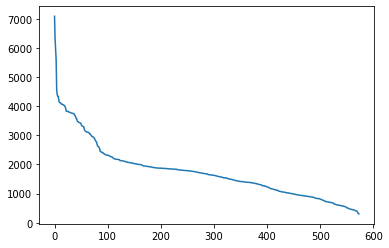

In [ ]:
all_files = []
for (dir_path, dir_names, file_names) in os.walk(dir + '/openfacecsv/'):
    all_files.extend(file_names)
# print(all_files)
file_size = []

for f in tqdm(all_files):
    df = pd.read_csv(dir + '/openfacecsv/'+f)
    file_size.append(len(df))
file_size.sort(reverse = True)
plt.plot(file_size)

#### All Frames Feature File

In [ ]:
min_len = 999999999
for f in tqdm(all_files):
    df = pd.read_csv(dir + '/openfacecsv/'+f)
    df = df.iloc[:,1:]
    user_id, ad_id = int(f.split('.')[0].split('_')[0][4:]), int(f.split('.')[0].split('_')[1]) + 1
    use_rows = []
    if(len(df)>=630):
        for i in range(0, len(df), len(df)//630):
            use_rows.append(i)
        # print(use_rows)
        min_len = min(min_len, len(use_rows))
        df = df.iloc[use_rows, :].to_numpy().ravel()
        data = [user_id, ad_id]
        data.extend(df)
        # min_len = min(min_len, len(data))

features_names = list(pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/processed_videos/openfacecsv/user00_0.csv').columns)
# features_df = pd.DataFrame(columns = features_names)

# counter_idx = 0
dfs_to_be_concatenated = []
for f_idx in range(0, len(all_files), 200):
    start = f_idx
    end = min(start + 200, len(all_files))
    features_list = []
    print(start, end, len(all_files[start:end]))
    for f in tqdm(all_files[start:end]):
        df = pd.read_csv(dir + '/openfacecsv/'+f)
        df = df.iloc[:,1:]
        user_id, ad_id = int(f.split('.')[0].split('_')[0][4:]), int(f.split('.')[0].split('_')[1]) + 1
        use_rows = []
        if(len(df)>=630):
            for i in range(0, len(df), len(df)//630):
                use_rows.append(i)
            # print(use_rows)
            use_rows = use_rows[:min_len]
            df = df.iloc[use_rows, :].to_numpy().ravel()
            data = [user_id, ad_id]
            data.extend(df)
            features_list.append(data)
    to_be_concatenated_features_df = pd.DataFrame(data = features_list)
    del features_list
    dfs_to_be_concatenated.append(to_be_concatenated_features_df)
features_df = pd.concat(dfs_to_be_concatenated)
features_df.to_pickle('../features.pkl')
print("Final Shape:",features_df.shape)

100%|██████████| 574/574 [03:17<00:00,  2.90it/s]


0 200 200


100%|██████████| 200/200 [01:39<00:00,  2.01it/s]


200 400 200


100%|██████████| 200/200 [01:03<00:00,  3.15it/s]


400 574 174


100%|██████████| 174/174 [00:58<00:00,  2.97it/s]


Final Shape: (529, 449905)


#### Median Frames Feature File(Bi-LSTM)

In [ ]:
min_len = 999999999
for f in tqdm(all_files):
    df = pd.read_csv(dir + '/openfacecsv/'+f)
    # print(df)
    # print(df.head())
    # break
    df = df.iloc[14::30,1:]
    user_id, ad_id = int(f.split('.')[0].split('_')[0][4:]), int(f.split('.')[0].split('_')[1]) + 1
    use_rows = []
    if(len(df)>=21):
        for i in range(0, len(df), len(df)//21):
            use_rows.append(i)
        # print(use_rows)
        min_len = min(min_len, len(use_rows))
        df = df.iloc[use_rows, :].to_numpy().ravel()
        data = [user_id, ad_id]
        data.extend(df)
        # min_len = min(min_len, len(data))

features_names = list(pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/processed_videos/openfacecsv/user00_0.csv').columns)
# features_df = pd.DataFrame(columns = features_names)
features_list = []
# counter_idx = 0
for f in tqdm(all_files):
    df = pd.read_csv(dir + '/openfacecsv/'+f)
    # df = df.iloc[1:,:]
    df = df.iloc[14::30,1:]
    user_id, ad_id = int(f.split('.')[0].split('_')[0][4:]), int(f.split('.')[0].split('_')[1]) + 1
    use_rows = []
    if(len(df)>=21):
        for i in range(0, len(df), len(df)//21):
            use_rows.append(i)
        # print(use_rows)
        use_rows = use_rows[:min_len]
        df = df.iloc[use_rows, :].to_numpy().ravel()
        data = [user_id, ad_id]
        data.extend(df)
        features_list.append(data)

100%|██████████| 574/574 [02:42<00:00,  3.53it/s]


In [ ]:
min_len

21

In [ ]:
features_df = pd.DataFrame(data = features_list)

In [ ]:
features_list = []

In [ ]:
features_df.shape

(531, 14975)

In [ ]:
features_df.to_pickle('../median_features.pkl')

In [ ]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,14965,14966,14967,14968,14969,14970,14971,14972,14973,14974
0,13,1,0.0,0.233,0.98,1.0,0.060575,-0.077685,-0.995136,-0.105556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12,1,0.0,0.014,0.98,1.0,-0.180028,-0.008295,-0.983627,-0.360142,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,1,0.0,0.233,0.98,1.0,-0.073169,0.000113,-0.997320,-0.184507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,1,0.0,0.014,0.98,1.0,-0.030381,-0.057344,-0.997892,-0.151510,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,14,1,0.0,0.233,0.93,1.0,0.143612,0.196879,-0.969853,-0.112321,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,25,14,0.0,0.233,0.98,1.0,0.017376,0.079002,-0.996723,0.054401,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
527,37,14,0.0,0.233,0.98,1.0,0.044193,0.059291,-0.997262,-0.150065,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,36,14,0.0,0.233,0.98,1.0,0.160417,0.041905,-0.986159,-0.076111,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
529,4,14,0.0,0.014,0.98,1.0,-0.067458,0.226827,-0.971596,-0.164781,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/15ceJOnSS-5QWTAsLa7Sbz34imGgk0Rr5/Neuro-Marketing/processed_videos'

### Model Training

In [ ]:
import pandas as pd

feature_x = pd.read_pickle('/content/drive/MyDrive/Neuro-Marketing/features.pkl')
label = pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/labels.csv')

feature_x.rename(columns={0: "user_id", 1: "vid_num"},inplace=True)

merged_df=pd.merge(feature_x,label,on=["user_id","vid_num"])

merged_df_x= merged_df.drop(['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2'],axis=1)
merged_df_info=merged_df[['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2']]

train_x,test_x,train_y,test_y = train_test_split(merged_df_x,merged_df_info,train_size=0.8, stratify=,shuffle=True)
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,train_size=0.875,shuffle=True)
train_x.shape,val_x.shape,test_x.shape,train_y.shape,val_y.shape,test_y.shape

SyntaxError: ignored

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
kbest=SelectKBest(k=100)
train_x = kbest.fit_transform(train_x, train_y["sam_arousal"])
train_x.shape

ValueError: ignored

In [ ]:
val_x = kbest.transform(val_x)

In [ ]:
val_x.shape

(35, 100)

In [ ]:
label = pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/labels.csv')
label.shape

(574, 16)

#### Machine Learning



bin_sam_arousal
Accuracy 0.6074766355140186
Precision 0.4656124497991968
Recall 0.4690325497287523
F1 0.4665242165242165


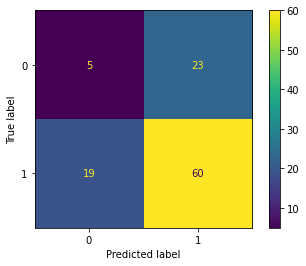



bin_sam_valence
Accuracy 0.5700934579439252
Precision 0.5603991596638656
Recall 0.5732173174872666
F1 0.5452697708795271


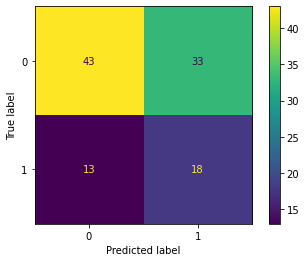



bin_arousal
Accuracy 0.5420560747663551
Precision 0.5288600288600288
Recall 0.5286738351254481
F1 0.5287191011235954


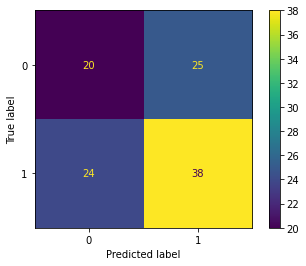



bin_valence
Accuracy 0.6542056074766355
Precision 0.637888418079096
Recall 0.6549603174603175
F1 0.6358870596891382


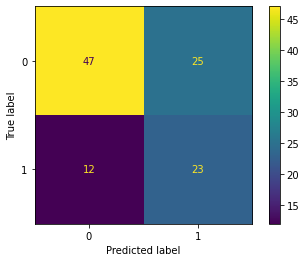



bin_seen
Accuracy 0.8878504672897196
Precision 0.5486798679867987
Recall 0.5372474747474747
F1 0.5414285714285715


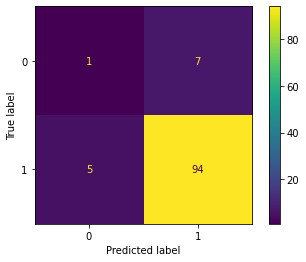



bin_share1
Accuracy 0.616822429906542
Precision 0.5097259062776305
Recall 0.5099457504520796
F1 0.5097776287853392


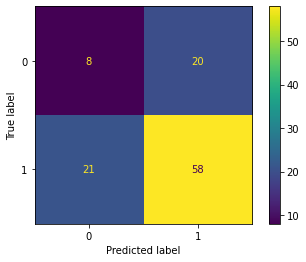



bin_share2
Accuracy 0.7009345794392523
Precision 0.4890788224121557
Recall 0.4762886597938144
F1 0.4656679151061174


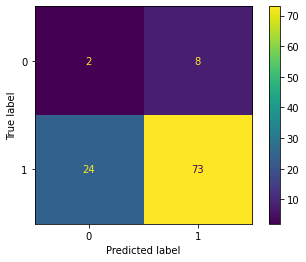

In [ ]:
import pandas as pd

feature_x = pd.read_pickle('/content/drive/MyDrive/Neuro-Marketing/median_features.pkl')
label = pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/labels.csv')

feature_x.rename(columns={0: "user_id", 1: "vid_num"},inplace=True)

merged_df=pd.merge(feature_x,label,on=["user_id","vid_num"])

merged_df_x= merged_df.drop(['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2'],axis=1)
merged_df_info=merged_df[['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2']]

for target in ['bin_sam_arousal', 'bin_sam_valence', 'bin_arousal', 'bin_valence', 'bin_seen', 'bin_share1', 'bin_share2']:
    print()
    print()
    print(target)
    train_x,test_x,train_y,test_y = train_test_split(merged_df_x,merged_df_info,train_size=0.8, stratify=merged_df_info[target],random_state=42)
    # print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

    #Scaling
    scaling = False
    if scaling:
        scaler = StandardScaler()
        train_x_scaled = scaler.fit_transform(train_x)
        test_x_scaled = scaler.transform(test_x)

    #PCA
    pca = PCA(n_components=400)
    if scaling:
        train_x_scaled_pca = pca.fit_transform(train_x_scaled)
        test_x_scaled_pca = pca.transform(test_x_scaled)
    else:
        train_x_scaled_pca = pca.fit_transform(train_x)
        test_x_scaled_pca = pca.transform(test_x)

    # clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf = RandomForestClassifier(random_state=42, class_weight = 'balanced_subsample')
    # clf = DecisionTreeClassifier(random_state=0, class_weight = 'balanced')
    # clf = SVC(random_state=0, class_weight = 'balanced')
    # clf = BalancedBaggingClassifier(random_state = 42)
    clf.fit(train_x_scaled_pca, train_y[target])
    test_y_pred=clf.predict(test_x_scaled_pca)
    print("Accuracy",accuracy_score(test_y_pred,test_y[target]))
    print("Precision",precision_score(test_y_pred,test_y[target],average='macro'))
    print("Recall",recall_score(test_y_pred,test_y[target],average='macro'))
    print("F1",f1_score(test_y_pred,test_y[target],average='macro'))
    # print("Confusion Matrix",confusion_matrix(test_y_pred,test_y[target]))
    cm = confusion_matrix(test_y_pred,test_y[target])
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

In [ ]:
import pandas as pd

feature_x = pd.read_pickle('/content/drive/MyDrive/Neuro-Marketing/median_features.pkl')
label = pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/labels.csv')

feature_x.rename(columns={0: "user_id", 1: "vid_num"},inplace=True)

merged_df=pd.merge(feature_x,label,on=["user_id","vid_num"])

merged_df_x= merged_df.drop(['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2'],axis=1)
merged_df_info=merged_df[['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2']]
models = {'Random Forest': RandomForestClassifier(random_state=42, class_weight = 'balanced_subsample'),
          'Adaboost': AdaBoostClassifier(n_estimators=100, random_state=0),
          'Decision Tree': DecisionTreeClassifier(random_state=0, class_weight = 'balanced'),
          'Support Vector Machine':SVC(random_state=0, class_weight = 'balanced'),
          'XGBoost': XGBClassifier()}
for model_name in ['Random Forest', 'Adaboost', 'Decision Tree', 'Support Vector Machine', 'XGBoost']:
    print(model_name)
    for target in ['bin_sam_arousal', 'bin_sam_valence', 'bin_arousal', 'bin_valence', 'bin_seen', 'bin_share1', 'bin_share2']:
        # print()
        # print()
        # print(target)
        train_x,test_x,train_y,test_y = train_test_split(merged_df_x,merged_df_info,train_size=0.8, stratify=merged_df_info[target],random_state=42)
        # print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

        #Scaling
        scaling = False
        if scaling:
            scaler = StandardScaler()
            train_x_scaled = scaler.fit_transform(train_x)
            test_x_scaled = scaler.transform(test_x)

        #PCA
        pca = PCA(n_components=400)
        if scaling:
            train_x_scaled_pca = pca.fit_transform(train_x_scaled)
            test_x_scaled_pca = pca.transform(test_x_scaled)
        else:
            train_x_scaled_pca = pca.fit_transform(train_x)
            test_x_scaled_pca = pca.transform(test_x)

        clf = models[model_name]
        clf.fit(train_x_scaled_pca, train_y[target])
        test_y_pred=clf.predict(test_x_scaled_pca)

        accuracy = accuracy_score(test_y_pred,test_y[target])
        precision = precision_score(test_y_pred,test_y[target],average='macro')
        recall = recall_score(test_y_pred,test_y[target],average='macro')
        f1 = f1_score(test_y_pred,test_y[target],average='macro')
        # print(target + ':\t\t' + str(accuracy) + '\t' + str(precision) + '\t' + str(recall) + '\t' + str(f1))
        print("{:15s}: {:0.2f} {:0.2f} {:0.2f} {:0.2f}".format(target, accuracy, precision, recall, f1))
    print()

Random Forest
bin_sam_arousal: 0.78 0.50 0.39 0.44
bin_sam_valence: 0.45 0.44 0.43 0.42
bin_arousal    : 0.57 0.50 0.50 0.44
bin_valence    : 0.60 0.56 0.64 0.51
bin_seen       : 0.94 0.50 0.47 0.49
bin_share1     : 0.73 0.50 0.36 0.42
bin_share2     : 0.76 0.50 0.38 0.43

Adaboost
bin_sam_arousal: 0.71 0.50 0.50 0.49
bin_sam_valence: 0.50 0.50 0.49 0.48
bin_arousal    : 0.50 0.48 0.48 0.48
bin_valence    : 0.55 0.54 0.54 0.54
bin_seen       : 0.94 0.50 0.47 0.49
bin_share1     : 0.62 0.51 0.51 0.51
bin_share2     : 0.61 0.45 0.45 0.45

Decision Tree
bin_sam_arousal: 0.61 0.47 0.47 0.47
bin_sam_valence: 0.57 0.56 0.57 0.55
bin_arousal    : 0.54 0.53 0.53 0.53
bin_valence    : 0.65 0.64 0.65 0.64
bin_seen       : 0.89 0.55 0.54 0.54
bin_share1     : 0.62 0.51 0.51 0.51
bin_share2     : 0.70 0.49 0.48 0.47

Support Vector Machine
bin_sam_arousal: 0.48 0.53 0.52 0.46
bin_sam_valence: 0.52 0.50 0.26 0.34
bin_arousal    : 0.41 0.50 0.21 0.29
bin_valence    : 0.55 0.50 0.28 0.36
bin_seen    

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

import pandas as pd

feature_x = pd.read_pickle('/content/drive/MyDrive/Neuro-Marketing/median_features.pkl')
label = pd.read_csv('/content/drive/MyDrive/Neuro-Marketing/labels.csv')

feature_x.rename(columns={0: "user_id", 1: "vid_num"},inplace=True)

merged_df=pd.merge(feature_x,label,on=["user_id","vid_num"])

merged_df_x= merged_df.drop(['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2'],axis=1)
merged_df_info=merged_df[['user_id','vid_num','sam_valence','sam_arousal','seen','valence','arousal','share1','share2','bin_sam_valence','bin_sam_arousal','bin_seen','bin_valence','bin_arousal','bin_share1','bin_share2']]
models = {'Random Forest': RandomForestClassifier(random_state=42, class_weight = 'balanced_subsample'),
          'Adaboost': AdaBoostClassifier(n_estimators=100, random_state=0),
          'Decision Tree': DecisionTreeClassifier(random_state=0, class_weight = 'balanced'),
          'Support Vector Machine':SVC(random_state=0, class_weight = 'balanced'),
          'XGBoost': XGBClassifier()}
for model_name in ['Random Forest', 'Adaboost', 'Decision Tree', 'Support Vector Machine', 'XGBoost']:
    print(model_name)
    for target in ['bin_sam_arousal', 'bin_sam_valence', 'bin_arousal', 'bin_valence', 'bin_seen', 'bin_share1', 'bin_share2']:
        # print()
        # print()
        # print(target)
        train_x,test_x,train_y,test_y = train_test_split(merged_df_x,merged_df_info,train_size=0.8, stratify=merged_df_info[target],random_state=42)
        # print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

        #Scaling
        scaling = False
        selectkbest = True
        pca = False

        if scaling:
            scaler = StandardScaler()
            train_x_scaled = scaler.fit_transform(train_x)
            test_x_scaled = scaler.transform(test_x)

        #PCA
        if pca:
            pca = PCA(n_components=400)
            if scaling:
                train_x_scaled_pca = pca.fit_transform(train_x_scaled)
                test_x_scaled_pca = pca.transform(test_x_scaled)
            else:
                train_x_scaled_pca = pca.fit_transform(train_x)
                test_x_scaled_pca = pca.transform(test_x)


        #Select K Best on flattened features
        if selectkbest:
            kbest = SelectKBest(k=400)
            if not pca and not scaling:
                train_x_scaled_pca = kbest.fit_transform(train_x, train_y[target])
                test_x_scaled_pca = kbest.transform(test_x)
        # train_x.shape

        clf = models[model_name]
        clf.fit(train_x_scaled_pca, train_y[target])
        test_y_pred=clf.predict(test_x_scaled_pca)

        accuracy = accuracy_score(test_y[target],test_y_pred)
        precision = precision_score(test_y[target], test_y_pred,average='macro')
        recall = recall_score(test_y[target], test_y_pred,average='macro')
        f1 = f1_score(test_y[target], test_y_pred,average='macro')
        # print(target + ':\t\t' + str(accuracy) + '\t' + str(precision) + '\t' + str(recall) + '\t' + str(f1))
        print("{:15s}: {:0.4f} {:0.4f} {:0.4f} {:0.4f}".format(target, accuracy, precision, recall, f1))
    print()

Random Forest
bin_sam_arousal: 0.7850 0.6971 0.5505 0.5413
bin_sam_valence: 0.5140 0.5075 0.5068 0.4982
bin_arousal    : 0.6168 0.5971 0.5718 0.5615
bin_valence    : 0.5327 0.5211 0.5200 0.5175
bin_seen       : 0.9439 0.4720 0.5000 0.4856
bin_share1     : 0.7383 0.6525 0.5931 0.5995
bin_share2     : 0.7383 0.3762 0.4877 0.4247

Adaboost
bin_sam_arousal: 0.7383 0.5989 0.5796 0.5853
bin_sam_valence: 0.5607 0.5590 0.5585 0.5583
bin_arousal    : 0.5981 0.5751 0.5662 0.5638
bin_valence    : 0.5794 0.5743 0.5740 0.5741
bin_seen       : 0.9346 0.4717 0.4950 0.4831
bin_share1     : 0.5794 0.4850 0.4841 0.4841
bin_share2     : 0.6542 0.4362 0.4582 0.4418

Decision Tree
bin_sam_arousal: 0.6355 0.5350 0.5429 0.5337
bin_sam_valence: 0.5607 0.5595 0.5593 0.5594
bin_arousal    : 0.5140 0.4910 0.4913 0.4905
bin_valence    : 0.4673 0.4605 0.4606 0.4605
bin_seen       : 0.9065 0.6048 0.6370 0.6179
bin_share1     : 0.6449 0.5417 0.5398 0.5405
bin_share2     : 0.6542 0.5114 0.5104 0.5103

Support Vector 

In [ ]:
# clf = RandomForestClassifier(random_state=0)
clf = SVC(random_state=0)
clf.fit(train_x_scaled_pca, train_y["bin_share1"])
test_y_pred=clf.predict(test_x_scaled_pca)
print("Accuracy",accuracy_score(test_y_pred,test_y["bin_share1"]))
print("Precision",precision_score(test_y_pred,test_y["bin_share1"],average='macro'))
print("Recall",recall_score(test_y_pred,test_y["bin_share1"],average='macro'))
print("F1",f1_score(test_y_pred,test_y["bin_share1"],average='macro'))
print("Confusion Matrix",confusion_matrix(test_y_pred,test_y["bin_share1"]))

Accuracy 0.8
Precision 0.5
Recall 0.4
F1 0.4444444444444445
Confusion Matrix [[ 0  0]
 [ 7 28]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# clf = RandomForestClassifier(random_state=0)
clf = SVC(random_state=0)
clf.fit(train_x_scaled_pca, train_y["bin_share2"])
test_y_pred=clf.predict(test_x_scaled_pca)
print("Accuracy",accuracy_score(test_y_pred,test_y["bin_share2"]))
print("Precision",precision_score(test_y_pred,test_y["bin_share2"],average='macro'))
print("Recall",recall_score(test_y_pred,test_y["bin_share2"],average='macro'))
print("F1",f1_score(test_y_pred,test_y["bin_share2"],average='macro'))
print("Confusion Matrix",confusion_matrix(test_y_pred,test_y["bin_share2"]))

Accuracy 0.8571428571428571
Precision 0.5
Recall 0.42857142857142855
F1 0.4615384615384615
Confusion Matrix [[ 0  0]
 [ 5 30]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# clf = RandomForestClassifier(random_state=0)
clf = SVC(random_state=0)
clf.fit(train_x_scaled_pca, train_y["bin_sam_valence"])
test_y_pred=clf.predict(test_x_scaled_pca)
print("Accuracy",accuracy_score(test_y_pred,test_y["bin_sam_valence"]))
print("Precision",precision_score(test_y_pred,test_y["bin_sam_valence"],average='macro'))
print("Recall",recall_score(test_y_pred,test_y["bin_sam_valence"],average='macro'))
print("F1",f1_score(test_y_pred,test_y["bin_sam_valence"],average='macro'))
print("Confusion Matrix",confusion_matrix(test_y_pred,test_y["bin_sam_valence"]))

Accuracy 0.42857142857142855
Precision 0.4638157894736842
Recall 0.38541666666666663
F1 0.33712121212121215
Confusion Matrix [[14 18]
 [ 2  1]]


In [ ]:
# clf = RandomForestClassifier(random_state=0)
clf = SVC(random_state=0)
clf.fit(train_x_scaled_pca, train_y["bin_sam_arousal"])
test_y_pred=clf.predict(test_x_scaled_pca)
print("Accuracy",accuracy_score(test_y_pred,test_y["bin_sam_arousal"]))
print("Precision",precision_score(test_y_pred,test_y["bin_sam_arousal"],average='macro'))
print("Recall",recall_score(test_y_pred,test_y["bin_sam_arousal"],average='macro'))
print("F1",f1_score(test_y_pred,test_y["bin_sam_arousal"],average='macro'))
print("Confusion Matrix",confusion_matrix(test_y_pred,test_y["bin_sam_arousal"]))

Accuracy 0.9428571428571428
Precision 0.5
Recall 0.4714285714285714
F1 0.4852941176470588
Confusion Matrix [[ 0  0]
 [ 2 33]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SAM Arousal:45.6 (better precision)
Arousal:45.6
SAM Valence:42
Valence:40.3
Share1:31.5
Share2:38.5

#### Deep Learning: BiLSTM

In [ ]:
import pandas as pd
import numpy as np
import io
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, TensorDataset
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,cohen_kappa_score,confusion_matrix,roc_curve,balanced_accuracy_score
import sys
import os

In [ ]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )
device

device(type='cuda', index=0)

In [ ]:
class BLSTM(nn.Module):
    """ input_dim will take input of how many columns of open face you will have basically columns of matrix (713)
    hidden_dim is upto you
    layer_dim is upto you: can take 1,2,3
    video_dim total number of frames of video
    output_dim number of classes , 5 states of arousal
    bid= boolean bidirectional
    """
    def __init__(self, input_dim, hidden_dim, layer_dim,video_dim, output_dim,bid):
        super(BLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim,bidirectional=bid)
        self.dropout = nn.Dropout(0.4)

        self.vid_o = 512

        if bid==True:
          self.num_dir=2
        else:
          self.num_dir=1

        self.video_len = video_dim

        self.fc= nn.Linear(self.video_len*hidden_dim*self.num_dir,self.vid_o)

        self.batch_norm = nn.BatchNorm1d(self.vid_o, affine = False)
        # self.fc_combined = nn.Sequential(nn.Linear(1000,100),nn.ReLU(),nn.Linear(100,100),nn.ReLU(),nn.Linear(100,100),nn.ReLU(),nn.Linear(100,100),nn.ReLU(),nn.Linear(100,10),nn.ReLU(),nn.Linear(10,output_dim))
        # self.fc_combined = nn.Sequential(nn.Linear(smile_o+seq_o,100),nn.ReLU(),nn.BatchNorm1d(100, affine = False),nn.Dropout(.5),nn.Linear(100,10),nn.ReLU(),nn.Linear(10,output_dim))
        # self.fc_combined = nn.Sequential(nn.Linear(smile_o+seq_o,10),nn.ReLU(),nn.Linear(10,output_dim))
        # self.fc_final = nn.Sequential(nn.ReLU(),nn.Linear(self.vid_o,output_dim))
        self.fc_final = nn.Sequential(nn.Linear(self.vid_o,64),nn.ReLU(),nn.Linear(64,output_dim))

    def forward(self, x1):
        x1=x1.to(device)
        h0 = torch.zeros(self.layer_dim*self.num_dir, x1.size(1), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim*self.num_dir, x1.size(1), self.hidden_dim).requires_grad_()

        h0=h0.to(device)
        c0=c0.to(device)

        #Applied LSTM layer on Frames
        out, (hn, cn) = self.lstm(x1, (h0, c0))

        # Add a dropout layer
        out = self.dropout(out)
        # Add dense/FFN layer
        out=self.fc(out.view(-1,self.video_len*self.hidden_dim*self.num_dir))

        out = self.dropout(out)

        # out_combined=torch.cat((out_smile,out_seq), dim=1)
        out = self.batch_norm(out)
        out=self.fc_final(out)

        prob=nn.Softmax(dim=1)(out)
        pred= out
        # pred=nn.LogSoftmax(dim=1)(out)

        return pred,prob

In [ ]:
class FFN_FeatureSelected(nn.Module):
    """ input_dim will take input of how many columns of open face you will have basically columns of matrix (713)
    hidden_dim is upto you
    layer_dim is upto you: can take 1,2,3
    video_dim total number of frames of video
    output_dim number of classes , 5 states of arousal
    bid= boolean bidirectional
    """
    def __init__(self, input_dim, hidden_dim, layer_dim,video_dim, output_dim,bid):
        super(FFN_FeatureSelected, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim,bidirectional=bid)
        self.dropout = nn.Dropout(0.4)

        self.vid_o = 512

        if bid==True:
          self.num_dir=2
        else:
          self.num_dir=1

        self.video_len = video_dim

        self.fc= nn.Linear(self.video_len*hidden_dim*self.num_dir,self.vid_o)

        self.batch_norm = nn.BatchNorm1d(self.vid_o, affine = False)
        # self.fc_combined = nn.Sequential(nn.Linear(1000,100),nn.ReLU(),nn.Linear(100,100),nn.ReLU(),nn.Linear(100,100),nn.ReLU(),nn.Linear(100,100),nn.ReLU(),nn.Linear(100,10),nn.ReLU(),nn.Linear(10,output_dim))
        # self.fc_combined = nn.Sequential(nn.Linear(smile_o+seq_o,100),nn.ReLU(),nn.BatchNorm1d(100, affine = False),nn.Dropout(.5),nn.Linear(100,10),nn.ReLU(),nn.Linear(10,output_dim))
        # self.fc_combined = nn.Sequential(nn.Linear(smile_o+seq_o,10),nn.ReLU(),nn.Linear(10,output_dim))
        # self.fc_final = nn.Sequential(nn.ReLU(),nn.Linear(self.vid_o,output_dim))
        self.fc_final = nn.Sequential(nn.Linear(self.vid_o,64),nn.ReLU(),nn.Linear(64,output_dim))

    def forward(self, x1):
        x1=x1.to(device)
        h0 = torch.zeros(self.layer_dim*self.num_dir, x1.size(1), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim*self.num_dir, x1.size(1), self.hidden_dim).requires_grad_()

        h0=h0.to(device)
        c0=c0.to(device)

        #Applied LSTM layer on Frames
        out, (hn, cn) = self.lstm(x1, (h0, c0))

        # Add a dropout layer
        out = self.dropout(out)
        # Add dense/FFN layer
        out=self.fc(out.view(-1,self.video_len*self.hidden_dim*self.num_dir))

        out = self.dropout(out)

        # out_combined=torch.cat((out_smile,out_seq), dim=1)
        out = self.batch_norm(out)
        out=self.fc_final(out)

        prob=nn.Softmax(dim=1)(out)
        pred= out
        # pred=nn.LogSoftmax(dim=1)(out)

        return pred,prob

Convert train test data into tensors and then create train loader test loader

In [ ]:
# TensorDataset with support of transforms
class CustomTensorDataset(Dataset):

    def __init__(self, tensors, transform=None):
        super(CustomTensorDataset, self).__init__()
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]

        # Transform the x Vector if transform is given
        if self.transform:
            x = self.transform(x)

        y = self.tensors[1][index]

        return x, y

    def __len__(self):
        return self.tensors[0].size(0)

In [ ]:
# model=BLSTM(713,100,2,21,2,True)
model=BLSTM(100,100,2,21,2,True)
model = model.to(device)
# criterion= nn.NLLLoss()
criterion= nn.CrossEntropyLoss()
criterion = criterion.to(device)
optimizer=optim.Adam(model.parameters(),lr=1e-5)
b_size=32

In [ ]:
train_x.shape

(240, 100)

In [ ]:
# train_x = train_x.to_numpy().reshape(-1,21,713)
# val_x = val_x.to_numpy().reshape(-1,21,713)
# test_x = test_x.to_numpy().reshape(-1,21,713)

train_x = train_x.reshape(-1,21,100)
val_x = val_x.reshape(-1,21,100)
test_x = test_x.reshape(-1,21,100)

ValueError: ignored

In [ ]:
output_variable="bin_arousal"

train_dataset_normal = CustomTensorDataset(tensors=(torch.from_numpy(train_x).float(),torch.from_numpy(train_y[output_variable].to_numpy()).float()))
trainloader=torch.utils.data.DataLoader(train_dataset_normal, batch_size=b_size, shuffle=True, drop_last=True,  num_workers=2)

test_dataset_normal = CustomTensorDataset(tensors=(torch.from_numpy(test_x).float(),torch.from_numpy(test_y[output_variable].to_numpy()).float()))
testloader=torch.utils.data.DataLoader(test_dataset_normal, batch_size=b_size, drop_last=True, num_workers=2)

val_dataset_normal = CustomTensorDataset(tensors=(torch.from_numpy(val_x).float(),torch.from_numpy(val_y[output_variable].to_numpy()).float()))
validationloader=torch.utils.data.DataLoader(val_dataset_normal, batch_size=b_size, drop_last=True, num_workers=2)

In [ ]:
# # batch size
# batch_size = 32
# number of epochs to train the model
n_epochs = 1000
print_every_x_epochs = int(n_epochs/100)
min_val_loss = 9999999999999
state = {}
for epoch in tqdm(range(1, n_epochs+1), position=0, leave=True):
    train_preds = []
    val_preds = []

    train_loss = 0.0


    training_loss = []
    validation_loss = []

    for inputs, labels in trainloader:
        batch_x, batch_y = inputs, labels

        optimizer.zero_grad()
        batch_y = batch_y.type(torch.LongTensor)
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        outputs = model(batch_x)[0]

        train_preds.extend(torch.argmax(outputs, 1))
        loss = criterion(outputs,batch_y)

        training_loss.append(loss.item())
        loss.backward()
        optimizer.step()


    for inputs, labels in validationloader:
        batch_x, batch_y = inputs, labels

        optimizer.zero_grad()
        batch_y = batch_y.type(torch.LongTensor)
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        outputs = model(batch_x)[0]
        val_preds.extend(torch.argmax(outputs, 1))
        loss = criterion(outputs,batch_y)
        validation_loss.append(loss.item())

    if min_val_loss > validation_loss[-1]:
        state = { 'epoch': epoch, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict(),}
        torch.save(state, "/content/drive/MyDrive/Neuro-Marketing/Saved Models/MIL.pth")
        min_val_loss = validation_loss[-1]

    validation_loss = np.average(validation_loss)
    training_loss = np.average(training_loss)

    train_preds = [int(i) for i in train_preds]

    if(epoch%print_every_x_epochs==0):
        s = 'epoch: \t'+str(epoch)+'\t training loss: '+ str(training_loss) + '\t validation loss: ' + str(validation_loss)
        print(s)

model.load_state_dict(state['state_dict'])
optimizer.load_state_dict(state['optimizer'])

  1%|          | 10/1000 [00:08<13:48,  1.20it/s]

epoch: 	10	 training loss: 0.7089683754103524	 validation loss: 0.7236872315406799


  2%|▏         | 20/1000 [00:17<13:31,  1.21it/s]

epoch: 	20	 training loss: 0.6979166269302368	 validation loss: 0.7650112509727478


  3%|▎         | 30/1000 [00:25<13:39,  1.18it/s]

epoch: 	30	 training loss: 0.6720391256468636	 validation loss: 0.7535985708236694


  4%|▍         | 40/1000 [00:33<13:30,  1.18it/s]

epoch: 	40	 training loss: 0.6764698880059379	 validation loss: 0.6842170357704163


  5%|▌         | 50/1000 [00:41<13:11,  1.20it/s]

epoch: 	50	 training loss: 0.6694594281060355	 validation loss: 0.6910657286643982


  6%|▌         | 60/1000 [00:50<12:58,  1.21it/s]

epoch: 	60	 training loss: 0.6462131568363735	 validation loss: 0.694076657295227


  7%|▋         | 70/1000 [00:58<12:39,  1.23it/s]

epoch: 	70	 training loss: 0.6261606386729649	 validation loss: 0.6840373873710632


  8%|▊         | 80/1000 [01:06<12:24,  1.24it/s]

epoch: 	80	 training loss: 0.6186205063547406	 validation loss: 0.7172836661338806


  9%|▉         | 90/1000 [01:14<12:29,  1.21it/s]

epoch: 	90	 training loss: 0.5799528360366821	 validation loss: 0.6777971982955933


 10%|█         | 100/1000 [01:22<12:21,  1.21it/s]

epoch: 	100	 training loss: 0.593010425567627	 validation loss: 0.6733841300010681


 11%|█         | 110/1000 [01:30<12:06,  1.23it/s]

epoch: 	110	 training loss: 0.5899915524891445	 validation loss: 0.6404985189437866


 12%|█▏        | 120/1000 [01:39<12:01,  1.22it/s]

epoch: 	120	 training loss: 0.5820630363055638	 validation loss: 0.6386384963989258


 13%|█▎        | 130/1000 [01:47<11:53,  1.22it/s]

epoch: 	130	 training loss: 0.5602835076195853	 validation loss: 0.6534386873245239


 14%|█▍        | 140/1000 [01:55<11:59,  1.20it/s]

epoch: 	140	 training loss: 0.5458767116069794	 validation loss: 0.6834458112716675


 15%|█▌        | 150/1000 [02:03<11:28,  1.23it/s]

epoch: 	150	 training loss: 0.560851731470653	 validation loss: 0.6488465666770935


 16%|█▌        | 160/1000 [02:12<11:30,  1.22it/s]

epoch: 	160	 training loss: 0.5414935435567584	 validation loss: 0.6650657057762146


 17%|█▋        | 170/1000 [02:20<11:21,  1.22it/s]

epoch: 	170	 training loss: 0.5450002891676766	 validation loss: 0.6149103045463562


 18%|█▊        | 180/1000 [02:28<11:08,  1.23it/s]

epoch: 	180	 training loss: 0.5554524106638772	 validation loss: 0.6530721783638


 19%|█▊        | 186/1000 [02:33<10:56,  1.24it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2d3cc32950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2d3cc32950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_w

epoch: 	190	 training loss: 0.5284647004944938	 validation loss: 0.7025055885314941


 20%|██        | 200/1000 [02:51<11:48,  1.13it/s]

epoch: 	200	 training loss: 0.5106440101351056	 validation loss: 0.6627928018569946


 21%|██        | 210/1000 [02:59<11:00,  1.20it/s]

epoch: 	210	 training loss: 0.5148928037711552	 validation loss: 0.6872432231903076


 22%|██▏       | 220/1000 [03:08<10:46,  1.21it/s]

epoch: 	220	 training loss: 0.48634987218039377	 validation loss: 0.6593618392944336


 23%|██▎       | 230/1000 [03:16<10:46,  1.19it/s]

epoch: 	230	 training loss: 0.528200456074306	 validation loss: 0.638360857963562


 24%|██▍       | 240/1000 [03:24<10:33,  1.20it/s]

epoch: 	240	 training loss: 0.5074374888624463	 validation loss: 0.7020761966705322


 25%|██▌       | 250/1000 [03:33<10:21,  1.21it/s]

epoch: 	250	 training loss: 0.4867608206612723	 validation loss: 0.6496047377586365


 26%|██▌       | 260/1000 [03:41<10:14,  1.21it/s]

epoch: 	260	 training loss: 0.5197483216013227	 validation loss: 0.6159277558326721


 27%|██▋       | 270/1000 [03:50<10:30,  1.16it/s]

epoch: 	270	 training loss: 0.47600878136498587	 validation loss: 0.629537045955658


 28%|██▊       | 280/1000 [03:58<10:12,  1.18it/s]

epoch: 	280	 training loss: 0.4818827893052782	 validation loss: 0.6683197617530823


 29%|██▉       | 290/1000 [04:07<09:54,  1.19it/s]

epoch: 	290	 training loss: 0.4677785762718746	 validation loss: 0.6144747138023376


 30%|███       | 300/1000 [04:15<09:55,  1.17it/s]

epoch: 	300	 training loss: 0.46074625849723816	 validation loss: 0.6785762310028076


 31%|███       | 310/1000 [04:23<09:37,  1.19it/s]

epoch: 	310	 training loss: 0.4538749541555132	 validation loss: 0.678087055683136


 32%|███▏      | 320/1000 [04:32<09:26,  1.20it/s]

epoch: 	320	 training loss: 0.4586580693721771	 validation loss: 0.6304274797439575


 33%|███▎      | 330/1000 [04:40<09:22,  1.19it/s]

epoch: 	330	 training loss: 0.45783834372247967	 validation loss: 0.6764929890632629


 34%|███▍      | 340/1000 [04:49<09:12,  1.19it/s]

epoch: 	340	 training loss: 0.434999018907547	 validation loss: 0.6659558415412903


 35%|███▌      | 350/1000 [04:57<09:02,  1.20it/s]

epoch: 	350	 training loss: 0.43437969258853365	 validation loss: 0.6900044083595276


 36%|███▌      | 360/1000 [05:05<08:56,  1.19it/s]

epoch: 	360	 training loss: 0.4591023027896881	 validation loss: 0.7077712416648865


 37%|███▋      | 370/1000 [05:14<08:44,  1.20it/s]

epoch: 	370	 training loss: 0.39860512954848154	 validation loss: 0.7202351093292236


 38%|███▊      | 380/1000 [05:22<08:37,  1.20it/s]

epoch: 	380	 training loss: 0.3792813037122999	 validation loss: 0.7622933387756348


 39%|███▉      | 390/1000 [05:30<08:40,  1.17it/s]

epoch: 	390	 training loss: 0.42351297395569937	 validation loss: 0.7792247533798218


 40%|████      | 400/1000 [05:39<08:31,  1.17it/s]

epoch: 	400	 training loss: 0.4009515217372349	 validation loss: 0.7338103652000427


 41%|████      | 410/1000 [05:47<08:11,  1.20it/s]

epoch: 	410	 training loss: 0.38242327741214205	 validation loss: 0.6832368969917297


 42%|████▏     | 420/1000 [05:56<08:07,  1.19it/s]

epoch: 	420	 training loss: 0.416054938520704	 validation loss: 0.7464160323143005


 43%|████▎     | 430/1000 [06:04<08:04,  1.18it/s]

epoch: 	430	 training loss: 0.36541504093578886	 validation loss: 0.6969069838523865


 44%|████▍     | 440/1000 [06:13<07:56,  1.17it/s]

epoch: 	440	 training loss: 0.401861561196191	 validation loss: 0.6978764533996582


 45%|████▌     | 450/1000 [06:21<07:39,  1.20it/s]

epoch: 	450	 training loss: 0.3914363256522587	 validation loss: 0.827872633934021


 46%|████▌     | 460/1000 [06:30<07:37,  1.18it/s]

epoch: 	460	 training loss: 0.36081791136945995	 validation loss: 0.776482105255127


 47%|████▋     | 470/1000 [06:38<07:31,  1.17it/s]

epoch: 	470	 training loss: 0.353623275245939	 validation loss: 0.7228211164474487


 48%|████▊     | 480/1000 [06:46<07:17,  1.19it/s]

epoch: 	480	 training loss: 0.3532899022102356	 validation loss: 0.7963698506355286


 49%|████▉     | 490/1000 [06:55<07:19,  1.16it/s]

epoch: 	490	 training loss: 0.3395714653389795	 validation loss: 0.8205359578132629


 50%|█████     | 500/1000 [07:04<07:08,  1.17it/s]

epoch: 	500	 training loss: 0.33207380771636963	 validation loss: 0.7322784066200256


 51%|█████     | 510/1000 [07:12<06:57,  1.17it/s]

epoch: 	510	 training loss: 0.3241714537143707	 validation loss: 0.8529274463653564


 52%|█████▏    | 520/1000 [07:21<06:44,  1.19it/s]

epoch: 	520	 training loss: 0.3539233250277383	 validation loss: 0.808584451675415


 53%|█████▎    | 530/1000 [07:29<06:42,  1.17it/s]

epoch: 	530	 training loss: 0.31492094908441814	 validation loss: 0.8263929486274719


 54%|█████▍    | 540/1000 [07:38<06:29,  1.18it/s]

epoch: 	540	 training loss: 0.3120669978005545	 validation loss: 0.858020007610321


 55%|█████▌    | 550/1000 [07:46<06:17,  1.19it/s]

epoch: 	550	 training loss: 0.3126743882894516	 validation loss: 0.8709061741828918


 56%|█████▌    | 560/1000 [07:54<06:10,  1.19it/s]

epoch: 	560	 training loss: 0.2948339028017862	 validation loss: 0.9987665414810181


 57%|█████▋    | 570/1000 [08:03<06:08,  1.17it/s]

epoch: 	570	 training loss: 0.29705906765801565	 validation loss: 0.9239726066589355


 58%|█████▊    | 580/1000 [08:11<05:55,  1.18it/s]

epoch: 	580	 training loss: 0.2828337230852672	 validation loss: 0.850284218788147


 59%|█████▉    | 590/1000 [08:20<05:51,  1.17it/s]

epoch: 	590	 training loss: 0.2525710676397596	 validation loss: 0.9922559261322021


 60%|██████    | 600/1000 [08:29<05:40,  1.17it/s]

epoch: 	600	 training loss: 0.2739914506673813	 validation loss: 1.0077842473983765


 61%|██████    | 610/1000 [08:37<05:31,  1.18it/s]

epoch: 	610	 training loss: 0.2450869381427765	 validation loss: 0.9527415037155151


 62%|██████▏   | 620/1000 [08:46<05:22,  1.18it/s]

epoch: 	620	 training loss: 0.2295702142374856	 validation loss: 0.9925650954246521


 63%|██████▎   | 630/1000 [08:54<05:16,  1.17it/s]

epoch: 	630	 training loss: 0.2654577110494886	 validation loss: 1.0487116575241089


 64%|██████▍   | 640/1000 [09:03<05:10,  1.16it/s]

epoch: 	640	 training loss: 0.2625167540141514	 validation loss: 1.0350596904754639


 65%|██████▌   | 650/1000 [09:11<04:58,  1.17it/s]

epoch: 	650	 training loss: 0.25678873913628714	 validation loss: 0.9614807963371277


 66%|██████▌   | 660/1000 [09:20<04:47,  1.18it/s]

epoch: 	660	 training loss: 0.2410195916891098	 validation loss: 1.0640603303909302


 67%|██████▋   | 670/1000 [09:28<04:50,  1.14it/s]

epoch: 	670	 training loss: 0.20842593269688742	 validation loss: 0.90547776222229


 68%|██████▊   | 680/1000 [09:37<04:35,  1.16it/s]

epoch: 	680	 training loss: 0.2310010939836502	 validation loss: 1.0737860202789307


 69%|██████▉   | 690/1000 [09:46<04:32,  1.14it/s]

epoch: 	690	 training loss: 0.24658397691590445	 validation loss: 1.1011970043182373


 70%|███████   | 700/1000 [09:55<04:23,  1.14it/s]

epoch: 	700	 training loss: 0.21986301243305206	 validation loss: 1.178689956665039


 71%|███████   | 710/1000 [10:03<04:14,  1.14it/s]

epoch: 	710	 training loss: 0.20257335156202316	 validation loss: 1.167734146118164


 72%|███████▏  | 720/1000 [10:12<04:03,  1.15it/s]

epoch: 	720	 training loss: 0.24000742499317443	 validation loss: 1.0787478685379028


 73%|███████▎  | 730/1000 [10:21<04:04,  1.10it/s]

epoch: 	730	 training loss: 0.24226310210568563	 validation loss: 1.1300623416900635


 74%|███████▍  | 740/1000 [10:31<04:05,  1.06it/s]

epoch: 	740	 training loss: 0.22627840510436467	 validation loss: 1.2183172702789307


 75%|███████▌  | 750/1000 [10:40<03:44,  1.11it/s]

epoch: 	750	 training loss: 0.20010586721556528	 validation loss: 1.1037222146987915


 76%|███████▌  | 760/1000 [10:50<03:36,  1.11it/s]

epoch: 	760	 training loss: 0.19867693100656783	 validation loss: 1.097528338432312


 77%|███████▋  | 770/1000 [10:58<03:23,  1.13it/s]

epoch: 	770	 training loss: 0.2055906844990594	 validation loss: 1.195941686630249


 78%|███████▊  | 780/1000 [11:07<03:17,  1.11it/s]

epoch: 	780	 training loss: 0.17511907858507975	 validation loss: 1.3650423288345337


 79%|███████▉  | 790/1000 [11:16<03:07,  1.12it/s]

epoch: 	790	 training loss: 0.1654909753373691	 validation loss: 1.2876684665679932


 80%|████████  | 800/1000 [11:26<03:09,  1.05it/s]

epoch: 	800	 training loss: 0.130357597555433	 validation loss: 1.24117112159729


 81%|████████  | 810/1000 [11:35<02:55,  1.08it/s]

epoch: 	810	 training loss: 0.1588272186262267	 validation loss: 1.3834409713745117


 82%|████████▏ | 820/1000 [11:44<02:40,  1.12it/s]

epoch: 	820	 training loss: 0.15302239997046335	 validation loss: 1.258487343788147


 83%|████████▎ | 830/1000 [11:53<02:36,  1.09it/s]

epoch: 	830	 training loss: 0.13678904197045735	 validation loss: 1.3234468698501587


 84%|████████▍ | 840/1000 [12:02<02:21,  1.13it/s]

epoch: 	840	 training loss: 0.1565819446529661	 validation loss: 1.3344581127166748


 85%|████████▌ | 850/1000 [12:11<02:19,  1.07it/s]

epoch: 	850	 training loss: 0.16296485279287612	 validation loss: 1.2847405672073364


 86%|████████▌ | 860/1000 [12:20<02:04,  1.12it/s]

epoch: 	860	 training loss: 0.16437313758901187	 validation loss: 1.3273061513900757


 87%|████████▋ | 870/1000 [12:29<01:55,  1.12it/s]

epoch: 	870	 training loss: 0.11404285154172353	 validation loss: 1.2143492698669434


 88%|████████▊ | 880/1000 [12:38<01:47,  1.12it/s]

epoch: 	880	 training loss: 0.15142546061958587	 validation loss: 1.3822320699691772


 89%|████████▉ | 890/1000 [12:47<01:38,  1.12it/s]

epoch: 	890	 training loss: 0.08928334287234715	 validation loss: 1.5223689079284668


 90%|█████████ | 900/1000 [12:56<01:32,  1.08it/s]

epoch: 	900	 training loss: 0.10218307908092226	 validation loss: 1.3714239597320557


 91%|█████████ | 910/1000 [13:05<01:19,  1.13it/s]

epoch: 	910	 training loss: 0.14440323093107768	 validation loss: 1.5539774894714355


 92%|█████████▏| 920/1000 [13:14<01:13,  1.08it/s]

epoch: 	920	 training loss: 0.11451257658856255	 validation loss: 1.4767342805862427


 93%|█████████▎| 930/1000 [13:23<01:01,  1.14it/s]

epoch: 	930	 training loss: 0.12080018860953194	 validation loss: 1.7862412929534912


 94%|█████████▍| 940/1000 [13:32<00:53,  1.12it/s]

epoch: 	940	 training loss: 0.12418510551963534	 validation loss: 1.3152271509170532


 95%|█████████▌| 950/1000 [13:41<00:46,  1.08it/s]

epoch: 	950	 training loss: 0.08666377195290156	 validation loss: 1.492071509361267


 96%|█████████▌| 960/1000 [13:50<00:35,  1.14it/s]

epoch: 	960	 training loss: 0.12264137927974973	 validation loss: 2.024707555770874


 97%|█████████▋| 970/1000 [13:59<00:25,  1.16it/s]

epoch: 	970	 training loss: 0.10402926057577133	 validation loss: 1.2930725812911987


 98%|█████████▊| 980/1000 [14:08<00:17,  1.14it/s]

epoch: 	980	 training loss: 0.10944320048604693	 validation loss: 1.5366358757019043


 99%|█████████▉| 990/1000 [14:17<00:08,  1.14it/s]

epoch: 	990	 training loss: 0.12380751328808921	 validation loss: 1.2619234323501587


100%|██████████| 1000/1000 [14:25<00:00,  1.16it/s]

epoch: 	1000	 training loss: 0.14583501805152213	 validation loss: 1.8077082633972168


In [ ]:
min_val_loss

0.5828405618667603

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("CM_"+title+".png")
    plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score,confusion_matrix

def provide_metrics(y_pred,y_true,dataset_name='Training'):
  print(dataset_name+" Accuracy",accuracy_score(y_true,y_pred))
  print(dataset_name+" Precision",precision_score(y_true,y_pred,average='macro'))
  print(dataset_name+" Recall",recall_score(y_true,y_pred,average='macro'))
  print(dataset_name+" F1",f1_score(y_true,y_pred,average='macro'))

Training Accuracy 0.9821428571428571
Training Precision 0.9719512195121951
Training Recall 0.9823431657665143
Training F1 0.9769902413970211


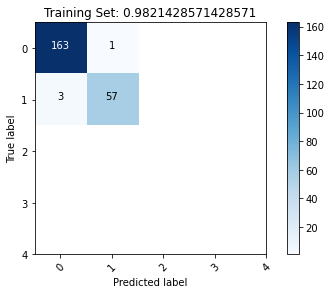

In [ ]:
# prediction for training set
prediction = []
target = []

for inputs, labels in trainloader:
    model.eval()
    batch_x, batch_y = inputs, labels

    optimizer.zero_grad()
    batch_y = batch_y.type(torch.LongTensor)
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
    outputs = model(batch_x)[0]

    prediction.extend(torch.argmax(outputs, 1).tolist())
    target.extend(batch_y.tolist())


# training accuracy
# print('training accuracy: \t', accuracy_score(target, prediction))
provide_metrics(target,prediction,'Training')
cm = confusion_matrix(target, prediction)
plot_confusion_matrix(cm, ['0', '1', '2', '3', '4'], title='Training Set: '+str(accuracy_score(target, prediction)))

Validation Accuracy 0.59375
Validation Precision 0.4375
Validation Recall 0.4314285714285714
Validation F1 0.4340136054421769


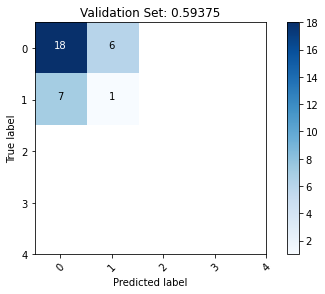

In [ ]:
# prediction for Validation set
prediction = []
target = []

for inputs, labels in validationloader:
    model.eval()
    batch_x, batch_y = inputs, labels

    optimizer.zero_grad()
    batch_y = batch_y.type(torch.LongTensor)
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
    outputs = model(batch_x)[0]

    prediction.extend(torch.argmax(outputs, 1).tolist())
    target.extend(batch_y.tolist())


# training accuracy
# print('Validation accuracy: \t', accuracy_score(target, prediction))
provide_metrics(target,prediction,'Validation')
cm = confusion_matrix(target, prediction)
plot_confusion_matrix(cm, ['0', '1', '2', '3', '4'], title='Validation Set: '+str(accuracy_score(target, prediction)))

In [ ]:
# # prediction for Test set
# prediction = []
# target = []

# for inputs, labels in testloader:
#     model.eval()
#     batch_x, batch_y = inputs, labels

#     optimizer.zero_grad()
#     batch_y = batch_y.type(torch.LongTensor)
#     batch_x, batch_y = batch_x.to(device), batch_y.to(device)
#     outputs = model(batch_x)[0]

#     prediction.extend(torch.argmax(outputs, 1).tolist())
#     target.extend(batch_y.tolist())


# # training accuracy
# # print('Test accuracy: \t', accuracy_score(target, prediction))
# provide_metrics(target,prediction,'Testing')
# cm = confusion_matrix(target, prediction)
# plot_confusion_matrix(cm, ['0', '1', '2', '3', '4'], title='Test Set: '+str(accuracy_score(target, prediction)))